In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from janitor import clean_names
import numpy as np
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
pt = PowerTransformer(standardize=True)

In [6]:
df = pd.read_excel('practica2.xlsx')
df = (clean_names(df)
      .dropna(subset = 'valoracion_global'))
df = df.replace(['No uso','no',' ','1o'],np.NaN)
df = df.reset_index(drop=True)
df['id']=df.reset_index().index
df

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,<5_causa,valoracion_global,id
0,8.0,8.0,8.0,8.0,9,8.0,8.0,7.0,8.0,8.0,NaN,9.0,0
1,NaN,10.0,9.0,10.0,10,NaN,8.0,NaN,9.0,9.0,NaN,9.0,1
2,8.0,10.0,7.0,7.0,10,7.0,8.0,8.0,8.0,8.0,NaN,7.0,2
3,9.0,8.0,8.0,9.0,10,10.0,5.0,5.0,7.0,10.0,NaN,9.0,3
4,8.0,9.0,8.0,9.0,9,9.0,NaN,NaN,9.0,9.0,NaN,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,10.0,9.0,10.0,10.0,8,10.0,7.0,NaN,10.0,10.0,NaN,8.0,1092
1093,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,9.0,9.0,Calefacción alta y refrigeración pobre en varano,7.0,1093
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1094
1095,6.0,5.0,8.0,8.0,6,7.0,6.0,3.0,NaN,0.0,La BPM Vicálvaro necesita una reforma de calad...,5.0,1095


In [9]:
dfnum = df.drop(['<5_causa'],axis = 1).astype('float')
dfnum[dfnum.columns] = SimpleImputer(strategy='median').fit_transform(dfnum[dfnum.columns])
dfnum.describe()

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,valoracion_global,id
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,7.744758,7.891522,8.231541,8.468551,9.185506,8.538742,7.927985,7.601641,8.139471,8.712853,8.473108,548.000000
std,1.660658,1.661086,1.846576,1.652571,1.438997,1.591665,2.264312,1.764129,2.031607,1.729560,1.349999,316.820927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,7.000000,8.000000,9.000000,8.000000,7.000000,8.000000,7.000000,8.000000,8.000000,274.000000
50%,8.000000,8.000000,9.000000,9.000000,10.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,548.000000
75%,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,10.000000,10.000000,9.000000,822.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.000000,10.000000,10.000000,1096.000000


In [10]:

pw = PowerTransformer(method='yeo-johnson')
dfnum[dfnum.columns.difference(['id','valoracion_global'])] = pw.fit_transform(dfnum[dfnum.columns.difference(['id','valoracion_global'])])
dfnum

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,valoracion_global,id
0,0.037279,-0.072756,-0.397804,-0.586679,-0.640905,-0.666652,-0.201810,-0.654844,-0.217617,-0.836139,9.0,0.0
1,0.037279,1.517583,0.331286,1.224834,0.756325,0.145962,-0.201810,0.090402,0.376508,-0.064324,9.0,1.0
2,0.037279,1.517583,-0.968633,-1.184006,0.756325,-1.257874,-0.201810,0.090402,-0.217617,-0.836139,7.0,2.0
3,0.793687,-0.072756,-0.397804,0.204909,0.756325,1.227960,-1.469851,-1.690133,-0.743607,0.996407,9.0,3.0
4,0.037279,0.664564,-0.397804,0.204909,-0.640905,0.145962,0.418993,0.090402,0.376508,-0.064324,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1.659053,0.664564,1.240011,1.224834,-1.419108,1.227960,-0.718332,0.090402,1.039456,0.996407,8.0,1092.0
1093,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,-0.718332,0.090402,0.376508,-0.064324,7.0,1093.0
1094,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,0.418993,0.090402,0.376508,-0.064324,8.0,1094.0
1095,-1.164536,-1.646728,-0.397804,-0.586679,-2.021212,-1.257874,-1.138317,-2.239119,0.376508,-2.229662,5.0,1095.0


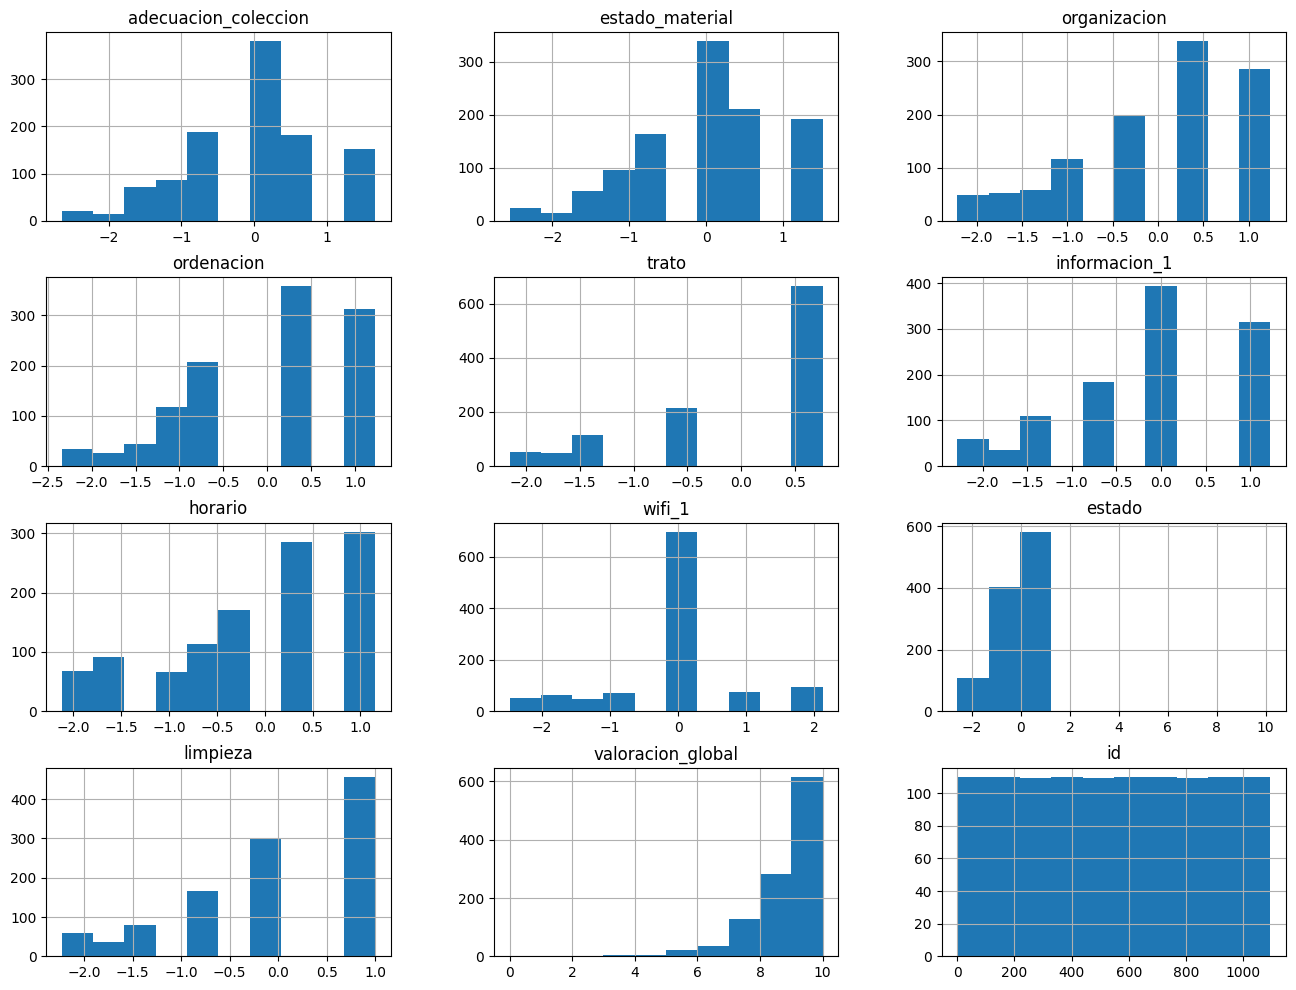

In [11]:
plots = dfnum.hist(figsize = (16,12))

In [12]:
dfCat = df[['<5_causa']].astype('string')
dfCat['id'] = df['id']
dfCat = dfCat.dropna()
dfCat

,<5_causa,id
5,Hace mucho calor en la sala de lectura y entra...,5
7,Unos días hace mucho frio y no se puede estar ...,7
8,Cuando ponen la calefación hace mucho calor y ...,8
10,"Hace demasiado calor en invierno y verano, imp...",10
16,Temperatura en la sala de estudio excesivament...,16
...,...,...
1081,Ahora no está puesto el aire (en verano).,1081
1084,Me gustaría que el horario de tarde se amplias...,1084
1085,Más refrigeración en algunos días calurosos.,1085
1093,Calefacción alta y refrigeración pobre en varano,1093


In [13]:
vectorizer = TfidfVectorizer(
      lowercase=True,
      stop_words=stopwords.words("spanish"),
      ngram_range=(2, 2))
vectorizer

TfidfVectorizer(ngram_range=(2, 2),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [14]:
vectorizer.fit(dfCat['<5_causa'])
X = vectorizer.transform(dfCat['<5_causa'])

In [15]:
tfidf = pd.DataFrame(data = X.toarray(),
                     columns=vectorizer.get_feature_names_out(),
                     index=dfCat['id'])

tfidf


,10 debido,10 experiencia,19 hace,2007 cáceres,27 28,28 dificulta,2ª planta,30 días,abiertas funciona,abiertas pesar,...,web renovaba,web resulta,wifi capada,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,ángel bibliotecarios,época refrigeración
id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
saved = pd.DataFrame(tfidf.sum(axis=0),columns=['sum']).sort_values(by = 'sum',ascending=False)
cs = saved['sum'].cumsum()
csplot = cs.loc[cs < saved['sum'].sum()*0.80]
final_words = list(csplot.index)
final_words.append('id')
final_words

['hace calor',
 'calor verano',
 'hace frio',
 'demasiado calor',
 'nunca funciona',
 'calor invierno',
 'sala lectura',
 'calor frío',
 'aire acondicionado',
 'sala estudio',
 'frio invierno',
 'frio calor',
 'invierno calor',
 'podría mejorar',
 'hace demasiado',
 'funciona climatización',
 'funciona aire',
 'calor siempre',
 'funciona bien',
 'mala iluminación',
 'invierno hace',
 'frío invierno',
 'acondicionado hace',
 'wifi falla',
 'falta luz',
 'préstamo intercentros',
 'invierno verano',
 'sistema funciona',
 'utilizo internet',
 'climatización deficiente',
 'funciona calefacción',
 'biblioteca refrescada',
 'falla wifi',
 'vino pandemia',
 'luz pésima',
 'ventilación natural',
 'sistema refrigeración',
 'servicio autopréstamo',
 'varias veces',
 'frío verano',
 'hace muchísimo',
 'muchísimo calor',
 'funciona peor',
 'falta iluminación',
 'poca luz',
 'calor enseguida',
 'hace frío',
 'calefacción alta',
 'abrigo puesto',
 'abrir ventanas',
 'calor ocasiones',
 'verano tardes

In [17]:
tfidf = tfidf[tfidf.columns.intersection(final_words)]

In [18]:
finaldf = dfnum.copy()
finaldf = finaldf.merge(tfidf,"left",on='id')
finaldf = finaldf.drop(['id'],axis=1)
finaldf = finaldf.fillna(0)

In [19]:
finaldf

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,...,web complicada,web renovaba,web resulta,wifi capada,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,época refrigeración
0,0.037279,-0.072756,-0.397804,-0.586679,-0.640905,-0.666652,-0.201810,-0.654844,-0.217617,-0.836139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.037279,1.517583,0.331286,1.224834,0.756325,0.145962,-0.201810,0.090402,0.376508,-0.064324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.037279,1.517583,-0.968633,-1.184006,0.756325,-1.257874,-0.201810,0.090402,-0.217617,-0.836139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.793687,-0.072756,-0.397804,0.204909,0.756325,1.227960,-1.469851,-1.690133,-0.743607,0.996407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.037279,0.664564,-0.397804,0.204909,-0.640905,0.145962,0.418993,0.090402,0.376508,-0.064324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1.659053,0.664564,1.240011,1.224834,-1.419108,1.227960,-0.718332,0.090402,1.039456,0.996407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1093,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,-0.718332,0.090402,0.376508,-0.064324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1094,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,0.418993,0.090402,0.376508,-0.064324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,-1.164536,-1.646728,-0.397804,-0.586679,-2.021212,-1.257874,-1.138317,-2.239119,0.376508,-2.229662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X = finaldf.drop(['valoracion_global'],axis = True)
y = finaldf.valoracion_global

In [89]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X,y)

DecisionTreeRegressor(max_depth=20)

In [90]:
ypred = model.predict(X)
model.score(X,y)

0.960668793872934

In [91]:
pd.Series(model.feature_importances_,index=model.feature_names_in_)

adecuacion_coleccion    0.051307
estado_material         0.040724
organizacion            0.063631
ordenacion              0.137121
trato                   0.319242
                          ...   
wifi falla              0.000000
wifi pésima             0.000000
wifi va                 0.000000
wifi vuelto             0.000000
época refrigeración     0.000000
Length: 918, dtype: float64

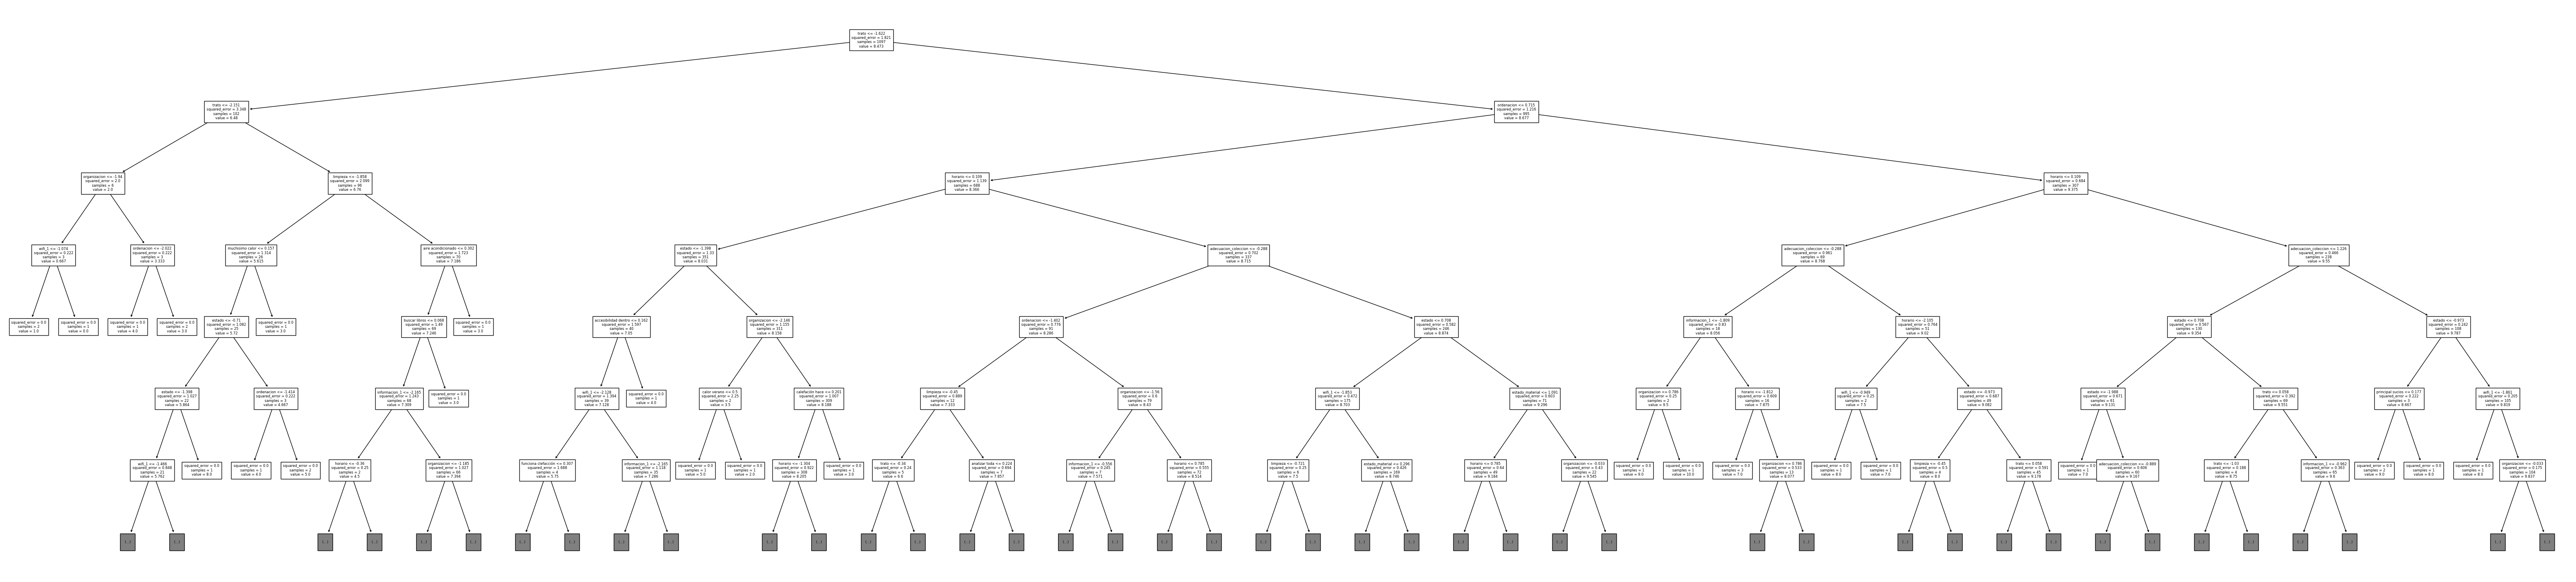

In [41]:
from sklearn import tree
plt.figure(figsize=(80,18))
tree.plot_tree(model, fontsize=6,feature_names=X.columns,max_depth=6)
plt.savefig('tree_high_dpi', dpi=200)

In [80]:
from sklearn.model_selection import GridSearchCV
modelHyper = DecisionTreeRegressor(random_state=42)
params = {
    'max_depth': [2, 3, 5, 10, 20,30,40,50],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split':[20,30,50]}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv=10, n_jobs=-1, verbose=1, scoring = "r2")


In [81]:
grid_search.fit(X,y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [20, 30, 50]},
             scoring='r2', verbose=1)

In [82]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047313,0.021834,0.017404,0.007590,2,5,20,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.203797,0.451434,...,0.272151,0.265353,0.160972,0.097316,0.243200,0.279053,0.043317,0.228134,0.106639,115
1,0.061988,0.018656,0.018735,0.009495,2,5,30,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.203797,0.451434,...,0.272151,0.265353,0.160972,0.097316,0.243200,0.279053,0.043317,0.228134,0.106639,115
2,0.044708,0.013724,0.014444,0.011004,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.203797,0.451434,...,0.272151,0.265353,0.160972,0.097316,0.243200,0.279053,0.043317,0.220971,0.106345,117
3,0.047864,0.012453,0.016650,0.009095,2,10,20,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.203797,0.476737,...,0.315939,0.273472,0.064304,0.127331,0.237396,0.279053,0.448484,0.267561,0.120536,105
4,0.065632,0.015137,0.015071,0.006171,2,10,30,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.203797,0.476737,...,0.315939,0.273472,0.064304,0.127331,0.237396,0.279053,0.448484,0.267561,0.120536,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.079095,0.016457,0.013916,0.003203,50,50,30,"{'max_depth': 50, 'min_samples_leaf': 50, 'min...",0.235655,0.526062,...,0.432929,0.400890,0.182880,0.208122,0.298484,0.301047,0.496778,0.353509,0.117696,37
116,0.068170,0.029685,0.015382,0.006060,50,50,50,"{'max_depth': 50, 'min_samples_leaf': 50, 'min...",0.235655,0.526062,...,0.432929,0.400890,0.182880,0.208122,0.298484,0.301047,0.496778,0.353509,0.117696,37
117,0.060310,0.018074,0.013826,0.003174,50,100,20,"{'max_depth': 50, 'min_samples_leaf': 100, 'mi...",0.178105,0.420100,...,0.425082,0.356034,-0.012609,0.190990,0.252401,0.245118,0.311223,0.278105,0.130928,85
118,0.061440,0.016200,0.017328,0.009732,50,100,30,"{'max_depth': 50, 'min_samples_leaf': 100, 'mi...",0.178105,0.420100,...,0.425082,0.356034,-0.012609,0.190990,0.252401,0.245118,0.311223,0.278105,0.130928,85


In [83]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=40, min_samples_leaf=20, min_samples_split=30)

In [84]:
dt_best = grid_search.best_estimator_

In [88]:
pd.Series(dt_best.feature_importances_,index=dt_best.feature_names_in_)

adecuacion_coleccion    0.035330
estado_material         0.007295
organizacion            0.010204
ordenacion              0.220788
trato                   0.419563
                          ...   
wifi falla              0.000000
wifi pésima             0.000000
wifi va                 0.000000
wifi vuelto             0.000000
época refrigeración     0.000000
Length: 918, dtype: float64

In [85]:
dt_best.predict(X)
dt_best.score(X,y)

0.56120450258949